In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage

import cv2
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization,concatenate, Layer, Lambda, Multiply, Add
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Voor GPU support
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
#images inladen
drive = []
path = "./DataCollected"
data = []
for j in os.listdir(path):
    print(j)
    newpath = f"{path}/{j}"
    if len(j.split(".")) > 1:
        dataset = pd.read_csv(newpath, names=["file", "forward", "direction", "ultrasonic"])
        data += dataset["direction"].tolist()
    else:
        for f in os.listdir(newpath):
            pass
            if ".jpg" in f:
                img = np.asarray(cv2.imread(os.path.join(newpath,f), cv2.IMREAD_COLOR))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = transform.resize(img, (66, 200),mode='constant', anti_aliasing=True)
                drive.append(img)


Data0
Data1
Data10
Data11
Data12
Data13
Data14
Data15
Data16
Data17
Data18
Data2
Data3
Data4
Data5
Data6
Data7
Data8
Data9
log_0.csv
log_1.csv
log_10.csv
log_11.csv
log_12.csv
log_13.csv
log_14.csv
log_15.csv
log_16.csv
log_17.csv
log_18.csv
log_2.csv
log_3.csv
log_4.csv
log_5.csv
log_6.csv
log_7.csv
log_8.csv
log_9.csv


In [10]:
X_train, X_test, y_train, y_test = train_test_split(drive, data, test_size=.2, random_state=0, shuffle=True)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(len(X_train))
print(len(y_train))

1456
1456


In [11]:
# NN parameters
name = "model_0"
batch_size = 32
epochs = 230

In [12]:
# Neural network
model = Sequential()
model.add(Input((66,200,3))) 
model.add(BatchNormalization())
model.add(Conv2D(24, (5, 5), (2, 2), activation='relu'))
model.add(Conv2D(36, (5, 5), (2, 2), activation='relu')) 
model.add(Conv2D(48, (5, 5), (2, 2), activation='relu')) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(Flatten())
model.add(Dense(100, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 66, 200, 3)        12        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [13]:
%%time
# train the model
earlystopper = EarlyStopping(patience=500, verbose=1)
checkpointer = ModelCheckpoint("./%s.h5" % name, verbose=1, save_best_only=True)
result = model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, callbacks=[earlystopper, checkpointer])
# save the history
json.dump(result.history, open("./%s.json" % name, 'w'))

====] - 1s 22ms/step - loss: 4.3596e-04 - accuracy: 0.8811 - val_loss: 0.1114 - val_accuracy: 0.8288

Epoch 00130: val_loss did not improve from 0.09595
Epoch 131/230
37/37 [==============================] - 1s 30ms/step - loss: 4.0224e-04 - accuracy: 0.8806 - val_loss: 0.1135 - val_accuracy: 0.8253

Epoch 00131: val_loss did not improve from 0.09595
Epoch 132/230
37/37 [==============================] - 1s 19ms/step - loss: 2.8039e-04 - accuracy: 0.8834 - val_loss: 0.1109 - val_accuracy: 0.8185

Epoch 00132: val_loss did not improve from 0.09595
Epoch 133/230
37/37 [==============================] - 1s 21ms/step - loss: 2.4164e-04 - accuracy: 0.8803 - val_loss: 0.1154 - val_accuracy: 0.8219

Epoch 00133: val_loss did not improve from 0.09595
Epoch 134/230
37/37 [==============================] - 1s 35ms/step - loss: 2.3323e-04 - accuracy: 0.8829 - val_loss: 0.1155 - val_accuracy: 0.8253

Epoch 00134: val_loss did not improve from 0.09595
Epoch 135/230
37/37 [==========================

In [14]:
# load the history and the model
history = json.load(open("./%s.json" % name, 'r'))
autoencoder = tf.keras.models.load_model('./%s.h5' % name)

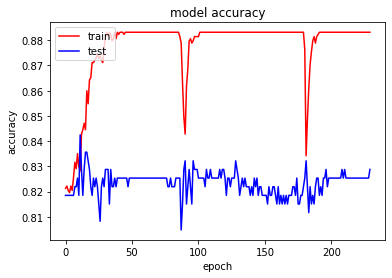

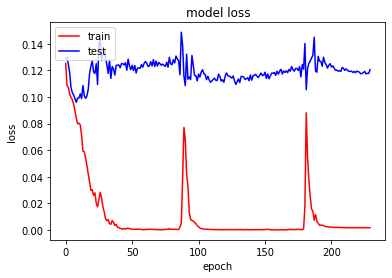

In [15]:
# Plot of the training history
# Accuray 
plt.plot(history['accuracy'],'r')
plt.plot(history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history['loss'],'r')
plt.plot(history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
img = np.asarray(X_test[0:20])
y_pred = model.predict(img)
# calculating the mean squared error reconstruction loss per row in the numpy array
for i in range(len(y_pred)):
    print(float(y_pred[i]))
    print(y_test[i])

-0.9909083843231201
-1.0
-0.0008556051179766655
0.0
-0.06824754923582077
0.0
-0.0008556051179766655
0.0
-0.9672771096229553
0.0
-0.0008556051179766655
0.0
-0.0008556051179766655
0.0
0.14037258923053741
0.0
-0.0008556051179766655
0.0
-0.0008556051179766655
0.0
-0.0008556051179766655
0.0
-0.012836254201829433
0.0
-0.7474576234817505
0.0
0.09222107380628586
-1.0
-0.0008556051179766655
0.0
-0.0008556051179766655
-0.92
-0.0008556051179766655
0.0
0.004453925881534815
0.0
-0.0008556051179766655
-1.0
-0.0008556051179766655
0.0
